In [1]:
import pandas as pd
import re

# Load data
train_data = pd.read_json('train.json')
test_data = pd.read_json('test.json')

# Inspect data
print("Training Data Sample:")
print(train_data.head())
print("\nTesting Data Sample:")
print(test_data.head())

# Check data structure
print("\nTraining Data Info:")
print(train_data.info())
print("\nTesting Data Info:")
print(test_data.info())

# Access reviews and sentiments
reviews = train_data['reviews']
sentiments = train_data['sentiments']
test_reviews = test_data['reviews']

Training Data Sample:
                                             reviews  sentiments
0  I bought this belt for my daughter in-law for ...           1
1  The size was perfect and so was the color.  It...           1
2  Fits and feels good, esp. for doing a swim rac...           1
3  These socks are absolutely the best. I take pi...           1
4  Thank you so much for the speedy delivery they...           1

Testing Data Sample:
                                             reviews
0  I bought 2 sleepers.  sleeper had holes in the...
1  I dare say these are just about the sexiest th...
2  everything about the transaction (price, deliv...
3  Not bad for just a shirt.  Very durable, and m...
4  These are truly wrinkle free and longer than t...

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7401 entries, 0 to 7400
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviews     7401 non-null   object
 

In [2]:
findDuplicate = train_data.duplicated()
print(findDuplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
7396    False
7397    False
7398    False
7399    False
7400    False
Length: 7401, dtype: bool


In [3]:
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'<[^>]+>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-alphabet characters
    return text

train_data['cleaned_reviews'] = train_data['reviews'].apply(clean_text)
test_data['cleaned_reviews'] = test_data['reviews'].apply(clean_text)
print(train_data[['reviews', 'cleaned_reviews']].head())
print(test_data[['reviews', 'cleaned_reviews']].head())

                                             reviews  \
0  I bought this belt for my daughter in-law for ...   
1  The size was perfect and so was the color.  It...   
2  Fits and feels good, esp. for doing a swim rac...   
3  These socks are absolutely the best. I take pi...   
4  Thank you so much for the speedy delivery they...   

                                     cleaned_reviews  
0  i bought this belt for my daughter inlaw for c...  
1  the size was perfect and so was the color  it ...  
2  fits and feels good esp for doing a swim race ...  
3  these socks are absolutely the best i take pil...  
4  thank you so much for the speedy delivery they...  
                                             reviews  \
0  I bought 2 sleepers.  sleeper had holes in the...   
1  I dare say these are just about the sexiest th...   
2  everything about the transaction (price, deliv...   
3  Not bad for just a shirt.  Very durable, and m...   
4  These are truly wrinkle free and longer than t... 

In [4]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download tokenizer

train_data['tokenized_reviews'] = train_data['cleaned_reviews'].apply(word_tokenize)
test_data['tokenized_reviews'] = test_data['cleaned_reviews'].apply(word_tokenize)
print(train_data[['tokenized_reviews', 'cleaned_reviews']].head())
print(test_data[['tokenized_reviews', 'cleaned_reviews']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                   tokenized_reviews  \
0  [i, bought, this, belt, for, my, daughter, inl...   
1  [the, size, was, perfect, and, so, was, the, c...   
2  [fits, and, feels, good, esp, for, doing, a, s...   
3  [these, socks, are, absolutely, the, best, i, ...   
4  [thank, you, so, much, for, the, speedy, deliv...   

                                     cleaned_reviews  
0  i bought this belt for my daughter inlaw for c...  
1  the size was perfect and so was the color  it ...  
2  fits and feels good esp for doing a swim race ...  
3  these socks are absolutely the best i take pil...  
4  thank you so much for the speedy delivery they...  
                                   tokenized_reviews  \
0  [i, bought, sleepers, sleeper, had, holes, in,...   
1  [i, dare, say, these, are, just, about, the, s...   
2  [everything, about, the, transaction, price, d...   
3  [not, bad, for, just, a, shirt, very, durable,...   
4  [these, are, truly, wrinkle, free, and, longer... 

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

train_data['tokenized_reviews'] = train_data['tokenized_reviews'].apply(lambda tokens: [t for t in tokens if t not in stop_words])
test_data['tokenized_reviews'] = test_data['tokenized_reviews'].apply(lambda tokens: [t for t in tokens if t not in stop_words])
print(train_data[['tokenized_reviews', 'cleaned_reviews']].head())
print(test_data[['tokenized_reviews', 'cleaned_reviews']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darre\AppData\Roaming\nltk_data...


                                   tokenized_reviews  \
0  [bought, belt, daughter, inlaw, christmas, loved]   
1    [size, perfect, color, looked, like, web, page]   
2  [fits, feels, good, esp, swim, race, highly, r...   
3  [socks, absolutely, best, take, pilates, class...   
4  [thank, much, speedy, delivery, came, time, re...   

                                     cleaned_reviews  
0  i bought this belt for my daughter inlaw for c...  
1  the size was perfect and so was the color  it ...  
2  fits and feels good esp for doing a swim race ...  
3  these socks are absolutely the best i take pil...  
4  thank you so much for the speedy delivery they...  
                                   tokenized_reviews  \
0  [bought, sleepers, sleeper, holes, arm, pit, a...   
1  [dare, say, sexiest, things, ive, ever, worn, ...   
2  [everything, transaction, price, delivery, tim...   
3  [bad, shirt, durable, matched, teams, colors, ...   
4  [truly, wrinkle, free, longer, average, womans... 

[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK resources (if you haven't already)
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    # Lemmatize each word and join them back into a single string
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the 'reviews' column
train_data['lemmatized_reviews'] = train_data['tokenized_reviews'].apply(lemmatize_text)
test_data['lemmatized_reviews'] = test_data['tokenized_reviews'].apply(lemmatize_text)

# Check the results
print(train_data[['tokenized_reviews', 'lemmatized_reviews']])
print(test_data[['tokenized_reviews', 'lemmatized_reviews']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      tokenized_reviews  \
0     [bought, belt, daughter, inlaw, christmas, loved]   
1       [size, perfect, color, looked, like, web, page]   
2     [fits, feels, good, esp, swim, race, highly, r...   
3     [socks, absolutely, best, take, pilates, class...   
4     [thank, much, speedy, delivery, came, time, re...   
...                                                 ...   
7396  [bought, shirts, black, medium, wear, daily, b...   
7397  [first, thought, scarf, might, good, quality, ...   
7398  [picky, comes, bras, want, something, support,...   
7399  [jacket, wind, water, resistant, waterproof, s...   
7400  [extremely, confortable, material, soft, cotto...   

                                     lemmatized_reviews  
0            bought belt daughter inlaw christmas loved  
1               size perfect color looked like web page  
2     fit feel good esp swim race highly recommend c...  
3     sock absolutely best take pilate class hot foo...  
4

In [14]:
# Bag-of-Words with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary to 5000 features

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['lemmatized_reviews'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['lemmatized_reviews'])
print(X_train_tfidf, X_test_tfidf)

  (0, 2492)	0.45843920782240244
  (0, 723)	0.45273207261187526
  (0, 1069)	0.46712709224698573
  (0, 366)	0.5296255945396366
  (0, 460)	0.29352371702664215
  (1, 2992)	0.5496386113125317
  (1, 4805)	0.5433162228756697
  (1, 2417)	0.21692542430104472
  (1, 2471)	0.3751954280155988
  (1, 801)	0.269465344889208
  (1, 3059)	0.29736757371725253
  (1, 3876)	0.2320292740319745
  (2, 1052)	0.15184248397849712
  (2, 125)	0.09535367183074904
  (2, 1908)	0.1413954506744648
  (2, 3005)	0.08587649258090961
  (2, 3479)	0.32026952163227945
  (2, 4556)	0.2648651605634925
  (2, 1304)	0.10032492112007892
  (2, 4133)	0.12265614053278985
  (2, 4362)	0.11927115988454905
  (2, 2585)	0.16537050996394426
  (2, 4170)	0.09153546182655006
  (2, 4995)	0.10787588457051396
  (2, 4706)	0.4619390471875414
  :	:
  (7399, 2538)	0.33098326741810113
  (7399, 417)	0.3152018468172896
  (7399, 3514)	0.30629071456306917
  (7399, 3353)	0.24679596312991667
  (7399, 4792)	0.26696682285415696
  (7399, 4873)	0.5478830976931597
  

In [15]:
# Pretrained Word Embeddings (GloVe)
import numpy as np
import gensim.downloader as api

# Load pretrained GloVe embeddings (100-dimensional)
glove_embeddings = api.load("glove-wiki-gigaword-100")

# Function to compute average word embeddings for a document
def get_embedding(text):
    words = text.split()
    # Retrieve word vectors for words in the text
    word_vectors = [glove_embeddings[word] for word in words if word in glove_embeddings]
    # Average word vectors, return zero vector if none found
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Apply embedding function to train and test sets
X_train_embeddings = np.array([get_embedding(review) for review in train_data['lemmatized_reviews']])
X_test_embeddings = np.array([get_embedding(review) for review in test_data['lemmatized_reviews']])
print(X_train_embeddings, X_test_embeddings)

[[ 0.2536082   0.09960021  0.0461194  ... -0.025372    0.15403798
  -0.18443999]
 [-0.32824612  0.39430472  0.33706826 ... -0.5844485   0.48381832
   0.23079385]
 [-0.18567558  0.07484949  0.04028473 ... -0.25064263  0.32835788
   0.11269587]
 ...
 [-0.16789854  0.3671648   0.18241015 ... -0.12978475  0.08620541
   0.27989608]
 [-0.41946948  0.3189645   0.09692693 ... -0.14635319  0.6512925
  -0.062278  ]
 [-0.18743446  0.25098795  0.08320183 ... -0.20713426  0.255295
  -0.04655975]] [[-0.07760081  0.20966174  0.20177999 ... -0.02998113  0.5716175
  -0.03326653]
 [-0.08026336  0.2584865   0.23067327 ... -0.18969542  0.16373073
   0.28327644]
 [ 0.04839709  0.1761227   0.30161512 ... -0.21523508  0.30893278
   0.30855575]
 ...
 [-0.10654669  0.1797221   0.403167   ... -0.21792121  0.12297471
   0.21646002]
 [ 0.3307515   0.25719124  0.04549199 ... -0.19566853  0.42858514
   0.24067242]
 [-0.25031716  0.24121025  0.21857493 ... -0.04955381  0.56093293
   0.07768656]]
Execution time: 66.9

In [17]:
# Pretrained Word Embeddings (Word2Vec)
import numpy as np
import gensim.downloader as api

# Load pretrained Word2Vec embeddings (300-dimensional)
word2vec_embeddings = api.load("word2vec-google-news-300")

# Function to compute average word embeddings for a document
def get_embedding(text):
    words = text.split()
    # Retrieve word vectors for words in the text
    word_vectors = [word2vec_embeddings[word] for word in words if word in word2vec_embeddings]
    # Average word vectors, return zero vector if none found
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)

# Apply embedding function to train and test sets
X_train_embeddings = np.array([get_embedding(review) for review in train_data['lemmatized_reviews']])
X_test_embeddings = np.array([get_embedding(review) for review in test_data['lemmatized_reviews']])

# Display the resulting embeddings
print(X_train_embeddings, X_test_embeddings)

KeyboardInterrupt: 

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_embeddings, dtype=torch.float32)
y_train_tensor = torch.tensor(train_data['sentiments'].values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)
y_test_tensor = torch.tensor(test_data['sentiments'].values, dtype=torch.float32)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x, _ = self.lstm(x.unsqueeze(1))  # Add a dimension for batch processing
        x = x[:, -1, :]  # Take the output from the last time step
        x = self.fc(x)
        return self.sigmoid(x).squeeze()

# Initialize model, criterion, and optimizer
input_dim = 100  # Embedding dimension for GloVe
hidden_dim = 128
output_dim = 1
model = LSTMClassifier(input_dim, hidden_dim, output_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}')

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            preds = (outputs > 0.5).float()
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(y_batch.cpu().numpy())
    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions, target_names=['Negative', 'Positive'])
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    return accuracy, report

# Train the model
train_model(model, train_loader, criterion, optimizer)

# Evaluate the model
evaluate_model(model, test_loader)

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\darre\anaconda3\Lib\site-packages\torch\lib\c10_cuda.dll" or one of its dependencies.

In [ ]:
# Pretrained Language Models (e.g., BERT)
from transformers import BertTokenizer, BertModel
import torch

# Load pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to obtain BERT embeddings for each review
def get_bert_embedding(text):
    # Tokenize text and convert tokens to tensor
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    # Use the [CLS] token embedding as the sentence embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding.flatten()

# Apply BERT embedding function to train and test sets
X_train_bert = np.array([get_bert_embedding(review) for review in train_data['lemmatized_reviews']])
X_test_bert = np.array([get_bert_embedding(review) for review in test_data['lemmatized_reviews']])
print(X_train_bert, X_test_bert)

In [9]:
# CNN
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

max_words = 700

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data['lemmatized_reviews'], train_data['sentiments'], test_size=0.2, random_state=1
)

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token='')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = sequence.pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = sequence.pad_sequences(X_test_sequences, maxlen=max_length)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the CNN model
embedding_dim = 50  # Adjust based on your preference
num_classes = len(set(y_train))

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), batch_size=batch_size, epochs=epochs)

# Evaluate the model on your test set
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Epoch 1/10


C:\Users\darre\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.8056 - loss: 0.4892 - val_accuracy: 0.8494 - val_loss: 0.3533
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8550 - loss: 0.3295 - val_accuracy: 0.8879 - val_loss: 0.2641
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.9170 - loss: 0.2111 - val_accuracy: 0.9061 - val_loss: 0.2423
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.9434 - loss: 0.1550 - val_accuracy: 0.9041 - val_loss: 0.2570
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.9647 - loss: 0.1079 - val_accuracy: 0.8967 - val_loss: 0.2583
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9776 - loss: 0.0766 - val_accuracy: 0.9082 - val_loss: 0.2971
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.9873 - loss: 0.0476 - val_accuracy: 0.9014 - val_loss: 0.3197
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9943 - loss: 0.0288 - val_accuracy: 0.906

In [10]:
# CNN classification report
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_probs = model.predict(X_test_padded)

# Convert predicted probabilities to classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Display the classification report
print(classification_report(y_test, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       223
           1       0.93      0.97      0.95      1258

    accuracy                           0.91      1481
   macro avg       0.85      0.77      0.80      1481
weighted avg       0.90      0.91      0.90      1481



In [20]:
!pip install transformers
!pip install accelerate>=0.20.1

Matplotlib is building the font cache; this may take a moment.


Testing with embedding_dim=50, kernel_size=3, filters=128, dropout_rate=0.3


C:\Users\darre\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 90.82%


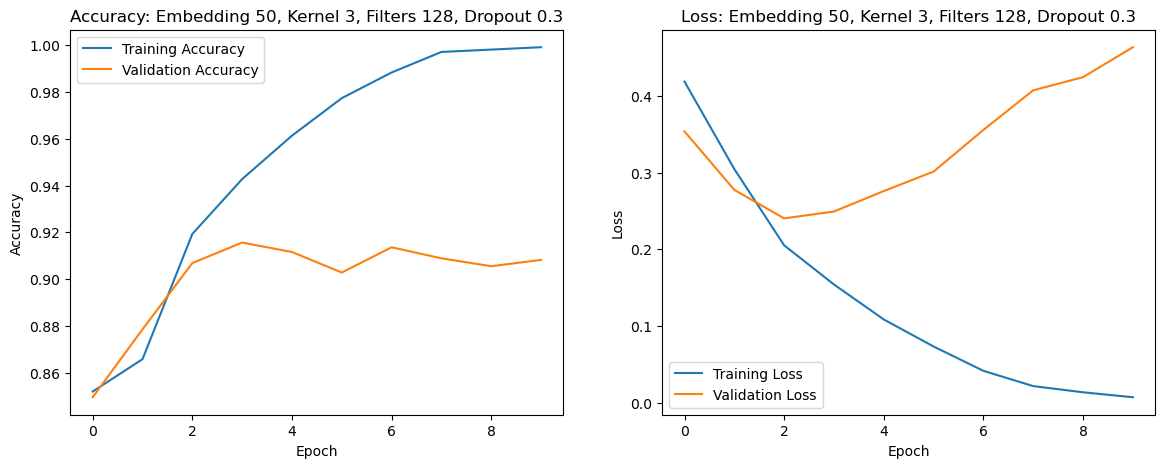

Testing with embedding_dim=50, kernel_size=3, filters=128, dropout_rate=0.5
Test Accuracy: 90.48%


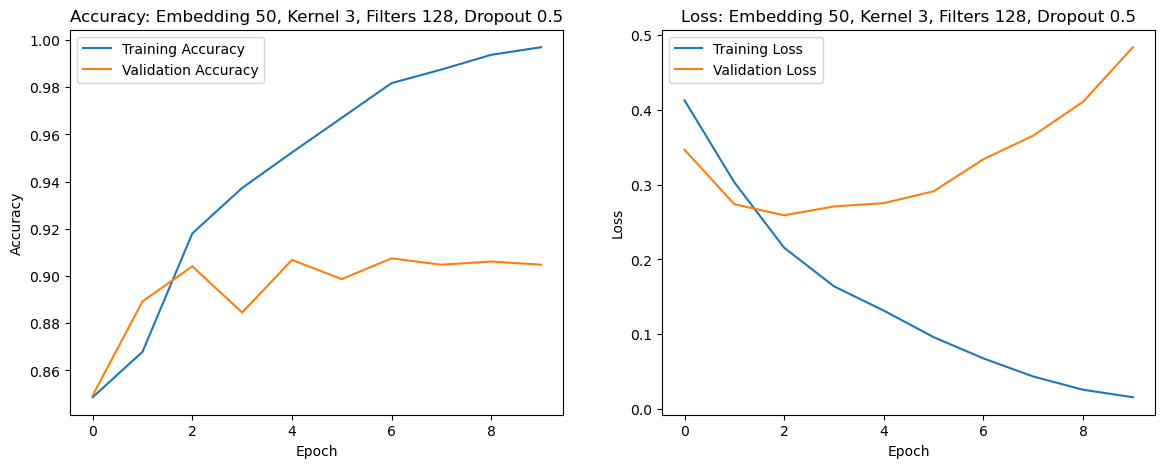

Testing with embedding_dim=50, kernel_size=3, filters=256, dropout_rate=0.3
Test Accuracy: 89.53%


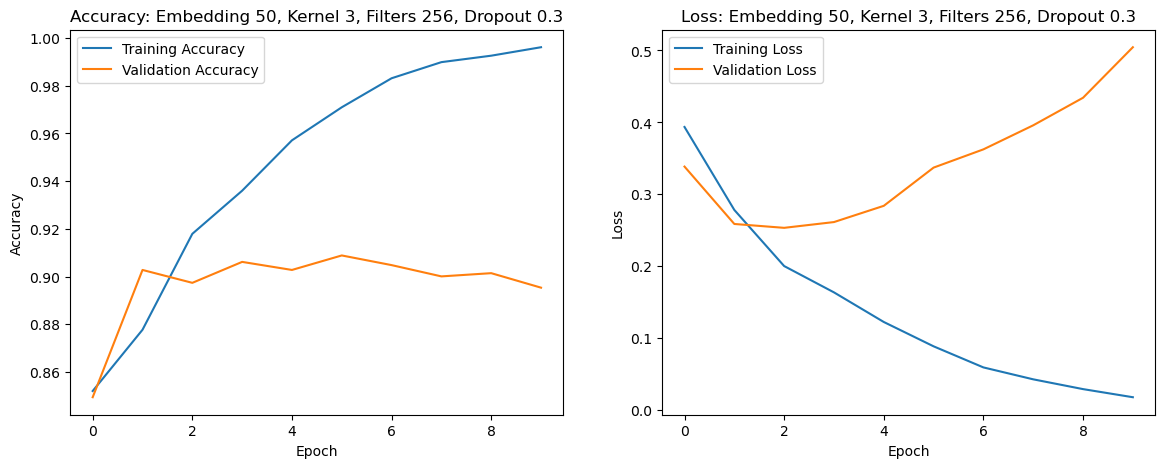

Testing with embedding_dim=50, kernel_size=3, filters=256, dropout_rate=0.5
Test Accuracy: 90.21%


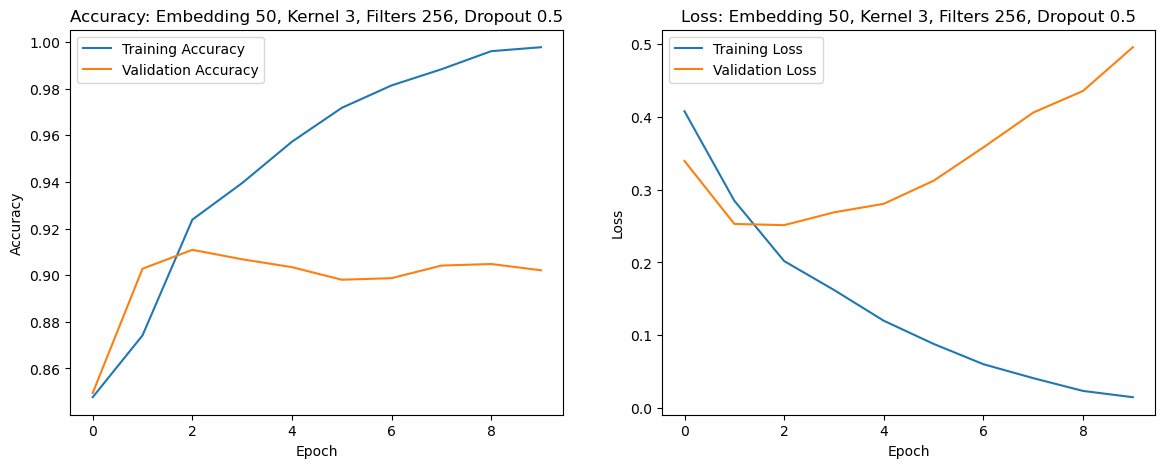

Testing with embedding_dim=50, kernel_size=5, filters=128, dropout_rate=0.3
Test Accuracy: 90.55%


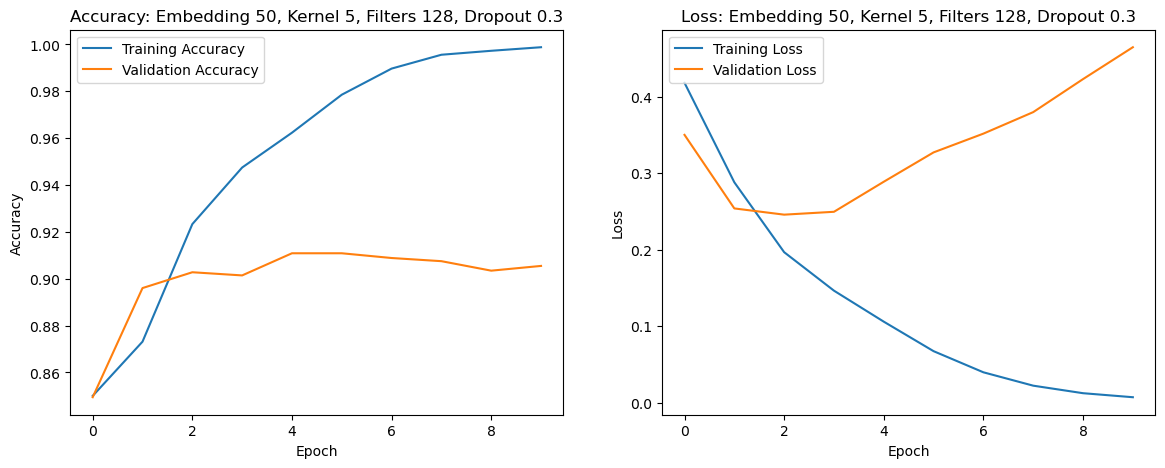

Testing with embedding_dim=50, kernel_size=5, filters=128, dropout_rate=0.5
Test Accuracy: 91.36%


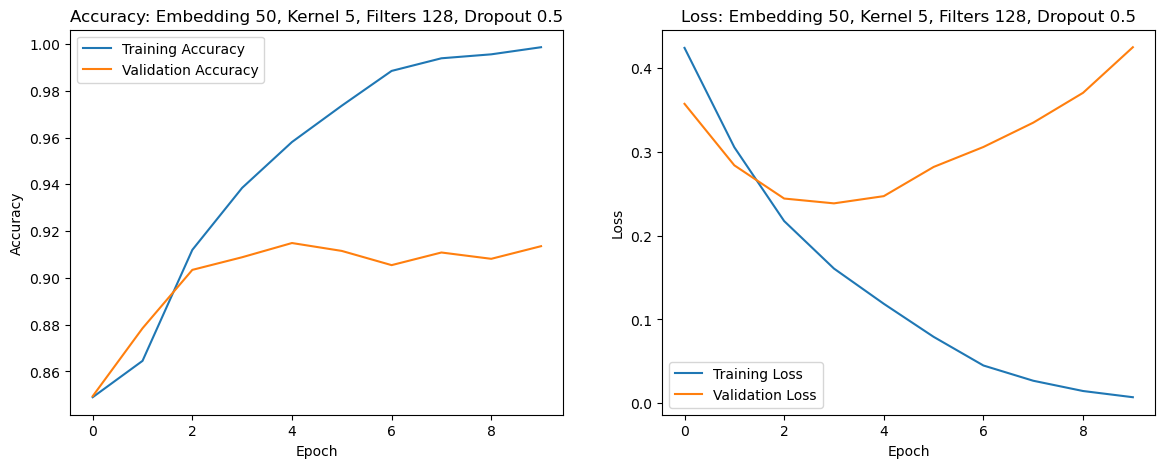

Testing with embedding_dim=50, kernel_size=5, filters=256, dropout_rate=0.3
Test Accuracy: 90.55%


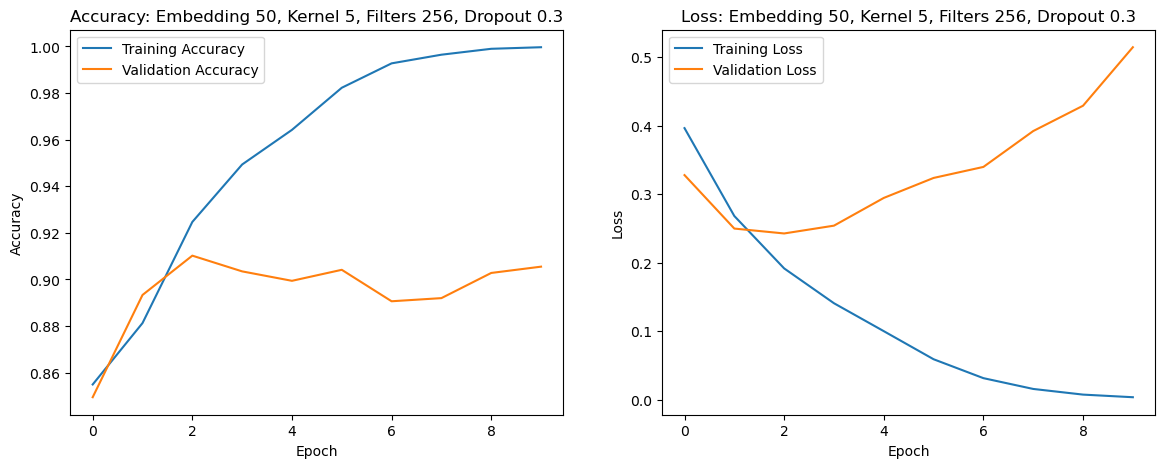

Testing with embedding_dim=50, kernel_size=5, filters=256, dropout_rate=0.5
Test Accuracy: 88.59%


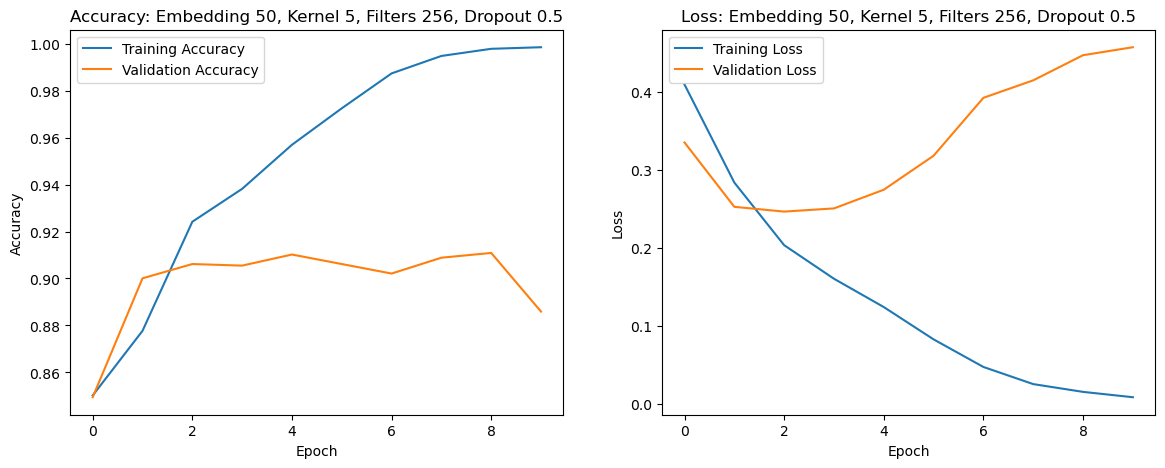

Testing with embedding_dim=100, kernel_size=3, filters=128, dropout_rate=0.3
Test Accuracy: 90.95%


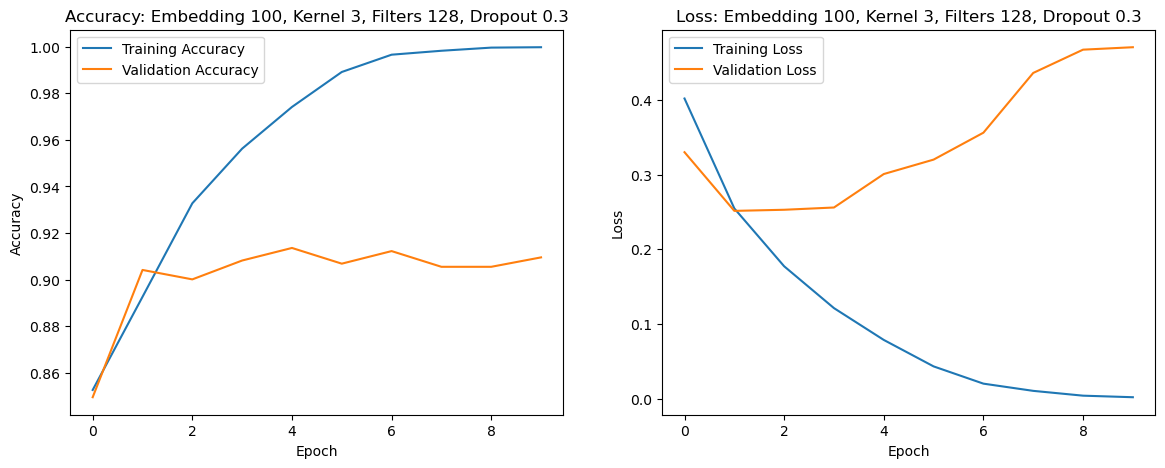

Testing with embedding_dim=100, kernel_size=3, filters=128, dropout_rate=0.5
Test Accuracy: 90.82%


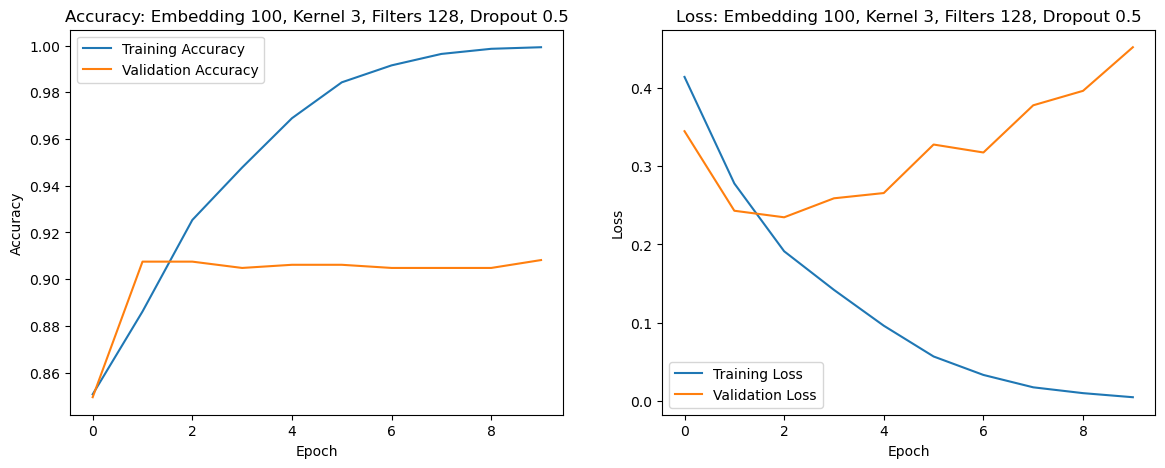

Testing with embedding_dim=100, kernel_size=3, filters=256, dropout_rate=0.3
Test Accuracy: 91.15%


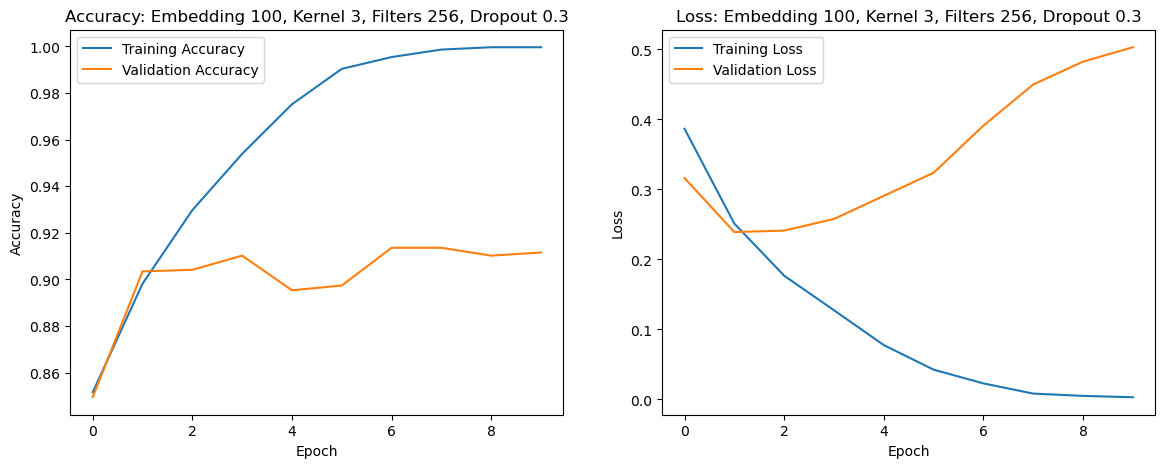

Testing with embedding_dim=100, kernel_size=3, filters=256, dropout_rate=0.5
Test Accuracy: 90.68%


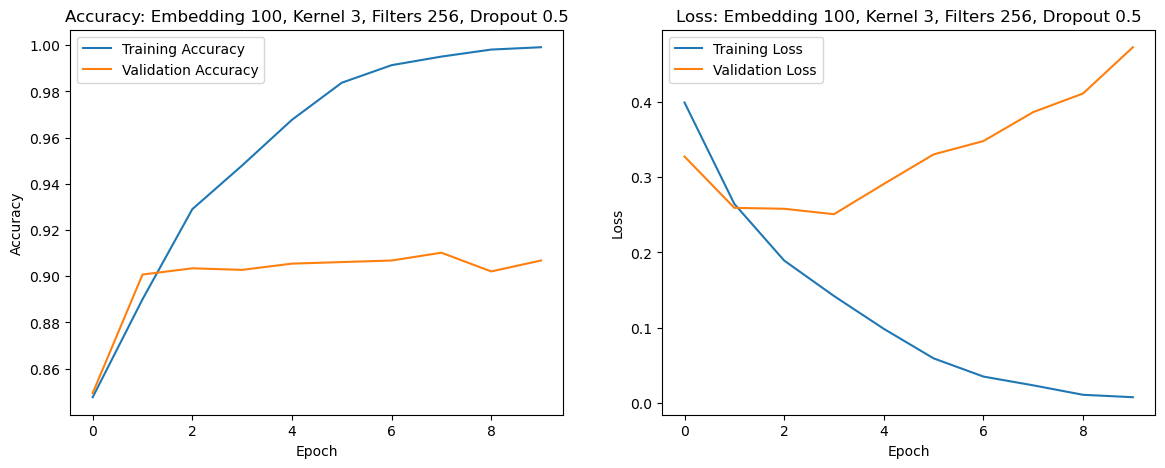

Testing with embedding_dim=100, kernel_size=5, filters=128, dropout_rate=0.3
Test Accuracy: 91.36%


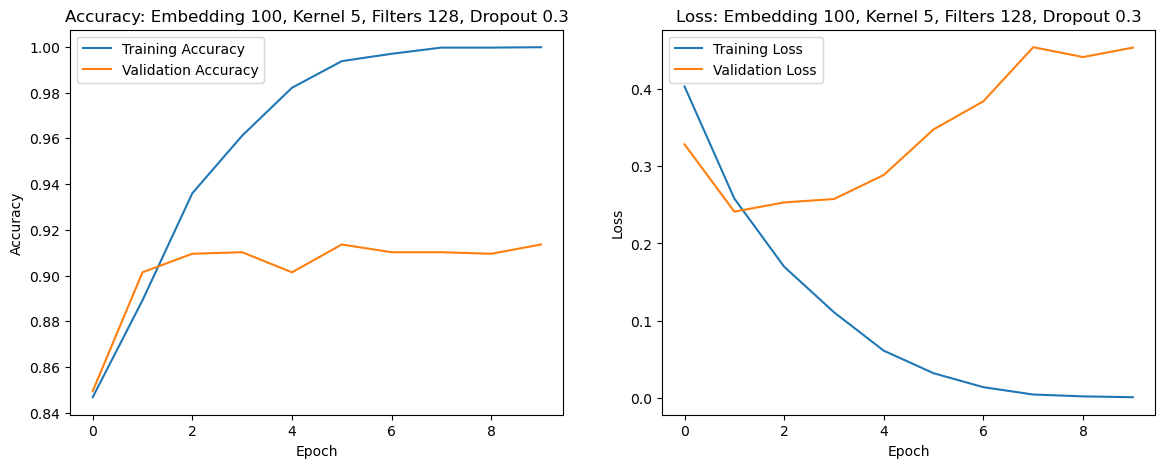

Testing with embedding_dim=100, kernel_size=5, filters=128, dropout_rate=0.5
Test Accuracy: 90.48%


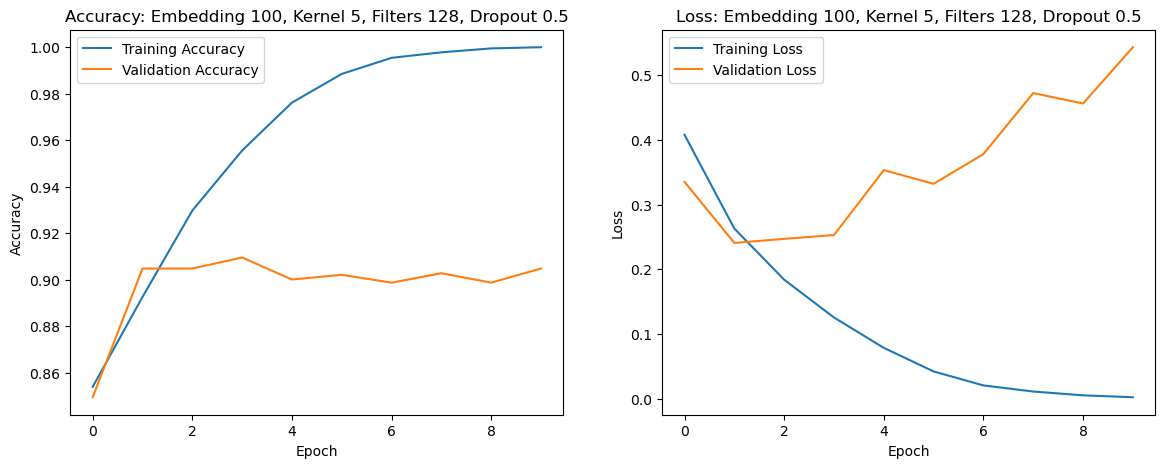

Testing with embedding_dim=100, kernel_size=5, filters=256, dropout_rate=0.3
Test Accuracy: 90.28%


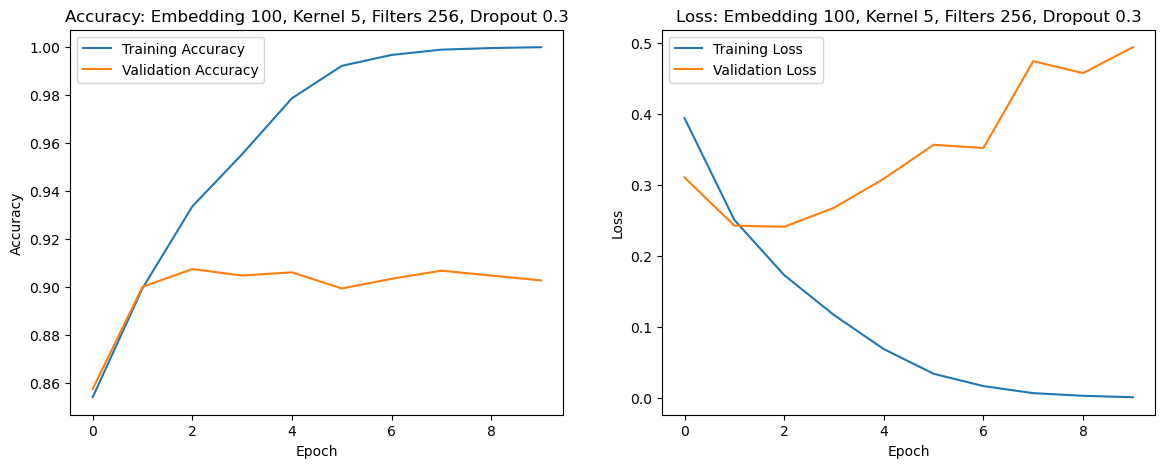

Testing with embedding_dim=100, kernel_size=5, filters=256, dropout_rate=0.5
Test Accuracy: 90.55%


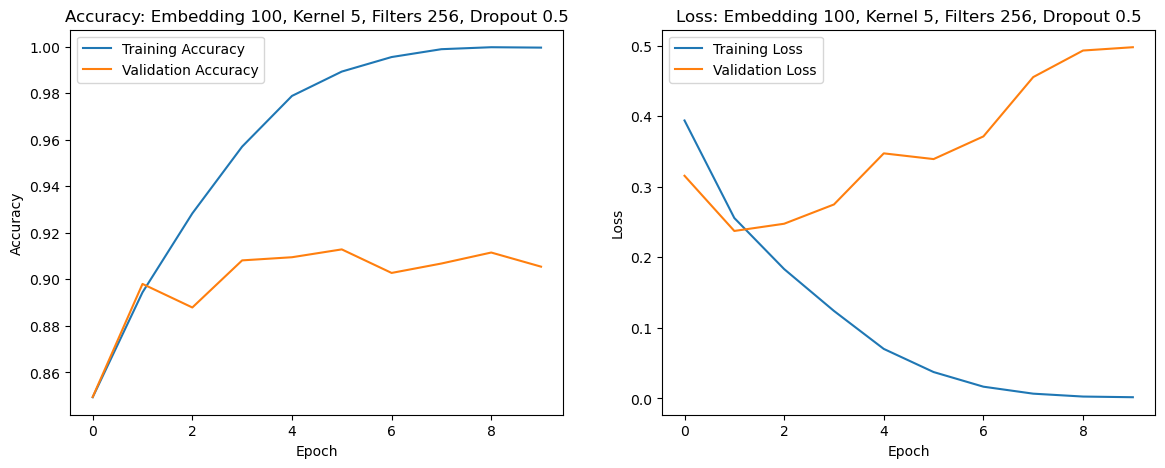


Best Model Parameters: {'embedding_dim': 50, 'kernel_size': 5, 'filters': 128, 'dropout_rate': 0.5}
Best Test Accuracy: 91.36%
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       223
           1       0.93      0.98      0.95      1258

    accuracy                           0.91      1481
   macro avg       0.87      0.77      0.81      1481
weighted avg       0.91      0.91      0.91      1481



In [11]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report

# Data Preparation
max_words = 700
X_train, X_test, y_train, y_test = train_test_split(
    train_data['lemmatized_reviews'], train_data['sentiments'], test_size=0.2, random_state=1
)
tokenizer = Tokenizer(num_words=max_words, oov_token='')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = sequence.pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = sequence.pad_sequences(X_test_sequences, maxlen=max_length)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Parameter Tuning
embedding_dims = [50, 100]
kernel_sizes = [3, 5]
num_filters = [128, 256]
dropout_rates = [0.3, 0.5]

best_model = None
best_acc = 0
best_params = {}

for embedding_dim in embedding_dims:
    for kernel_size in kernel_sizes:
        for filters in num_filters:
            for dropout_rate in dropout_rates:
                print(f"Testing with embedding_dim={embedding_dim}, kernel_size={kernel_size}, filters={filters}, dropout_rate={dropout_rate}")

                # Create the CNN model
                model = Sequential()
                model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
                model.add(Conv1D(filters, kernel_size, activation='relu'))
                model.add(GlobalMaxPooling1D())
                model.add(Dense(128, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(2, activation='softmax'))

                # Compile the model
                model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train the model and store history
                history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), batch_size=64, epochs=10, verbose=0)

                # Evaluate on test set
                test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=0)

                # Save the best model
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_model = model
                    best_params = {
                        'embedding_dim': embedding_dim,
                        'kernel_size': kernel_size,
                        'filters': filters,
                        'dropout_rate': dropout_rate
                    }

                print(f"Test Accuracy: {test_acc * 100:.2f}%")

                # Plotting training and validation accuracy/loss
                plt.figure(figsize=(14, 5))

                # Accuracy plot
                plt.subplot(1, 2, 1)
                plt.plot(history.history['accuracy'], label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.title(f"Accuracy: Embedding {embedding_dim}, Kernel {kernel_size}, Filters {filters}, Dropout {dropout_rate}")
                plt.legend()

                # Loss plot
                plt.subplot(1, 2, 2)
                plt.plot(history.history['loss'], label='Training Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title(f"Loss: Embedding {embedding_dim}, Kernel {kernel_size}, Filters {filters}, Dropout {dropout_rate}")
                plt.legend()

                plt.show()

# Final evaluation of best model
print("\nBest Model Parameters:", best_params)
print(f"Best Test Accuracy: {best_acc * 100:.2f}%")

# Classification report for best model
y_pred_probs = best_model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred))

In [14]:
import json
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences
X_test_sequences = tokenizer.texts_to_sequences(test_data['lemmatized_reviews'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

# Make predictions
y_test_pred_probs = best_model.predict(X_test_padded)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Display the predictions
test_data['predicted_sentiment'] = y_test_pred
print(test_data[['reviews', 'predicted_sentiment']])

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
                                                reviews  predicted_sentiment
0     I bought 2 sleepers.  sleeper had holes in the...                    0
1     I dare say these are just about the sexiest th...                    1
2     everything about the transaction (price, deliv...                    1
3     Not bad for just a shirt.  Very durable, and m...                    1
4     These are truly wrinkle free and longer than t...                    1
...                                                 ...                  ...
1846  These are stylish and nice and perfect to wear...                    1
1847  We bought these long-sleeved colored shirts fo...                    1
1848  These are really cute and very sexy.  They wil...                    1
1849  These shoers were for my daughter.  She loves ...                    1
1850  Most umbrellas handle a light rain well, but l...                    1

[1851 rows x 2 columns]


In [16]:
# Imports
import numpy as np
import gensim.downloader as api  # For loading pre-trained Word2Vec
from tensorflow.keras.preproessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load pre-trained Word2Vec model
word2vec = api.load("word2vec-google-news-300")  # Loads the 300-dimensional Google Word2Vec model

# Parameters
max_words = 700  # Max vocabulary size
max_length = 100  # Max sequence length

# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(
    train_data['lemmatized_reviews'], train_data['sentiments'], test_size=0.2, random_state=1
)

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

# Preparing the embedding matrix
embedding_dim = 300  # Dimension of Word2Vec embeddings
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        if word in word2vec:  # Check if the word is in the Word2Vec vocabulary
            embedding_vector = word2vec[word]
            embedding_matrix[i] = embedding_vector

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_length, trainable=False))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (sigmoid activation)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), batch_size=batch_size, epochs=epochs)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Classification report
y_pred_probs = model.predict(X_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Threshold probabilities to get class labels
print(classification_report(y_test, y_pred))

C:\Users\darre\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.8275 - loss: 0.5338 - val_accuracy: 0.8494 - val_loss: 0.4120
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8611 - loss: 0.3843 - val_accuracy: 0.8494 - val_loss: 0.3645
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8548 - loss: 0.3564 - val_accuracy: 0.8494 - val_loss: 0.3343
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8571 - loss: 0.3327 - val_accuracy: 0.8670 - val_loss: 0.3134
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8749 - loss: 0.3036 - val_accuracy: 0.8771 - val_loss: 0.2959
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8775 - loss: 0.2899 - val_accuracy: 0.8839 - val_loss: 0.2864
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8926 - loss: 0.2623 - val_accuracy: 0.8805 - val_loss: 0.2796
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8931 - loss: 0.2775 - val_accuracy: 0.8798 - val_lo

In [19]:
import json
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences for the test data
X_test_sequences = tokenizer.texts_to_sequences(test_data['lemmatized_reviews'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

# Make predictions on the test data
y_test_pred_probs = model.predict(X_test_padded)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32").flatten()  # Threshold at 0.5 for binary classification

# Add the predictions to the test_data dataframe
test_data['predicted_sentiment'] = y_test_pred

# Save the predictions to a CSV file
test_data.to_csv('test_results.csv', index=False)  # Save without the index column for cleaner output

# Display the review texts and predicted sentiments
print(test_data[['lemmatized_reviews', 'predicted_sentiment']])

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                                     lemmatized_reviews  predicted_sentiment
0     bought sleeper sleeper hole arm pit area sleep...                    0
1     dare say sexiest thing ive ever worn oh ive gs...                    1
2     everything transaction price delivery time qua...                    1
3     bad shirt durable matched team color perfectly...                    1
4     truly wrinkle free longer average woman botton...                    1
...                                                 ...                  ...
1846  stylish nice perfect wear pair cutoff levi cut...                    1
1847  bought longsleeved colored shirt child wear ro...                    1
1848  really cute sexy make nice valentine day prese...                    1
1849  shoers daughter love long happy happy adidas d...                    1
1850  umbrella handle light rain well leave wet pant...                    1

[1851 rows x 2 columns]


Testing with embedding_dim=50, kernel_size=5, filters=128, dropout_rate=0.5


C:\Users\darre\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 90.14%


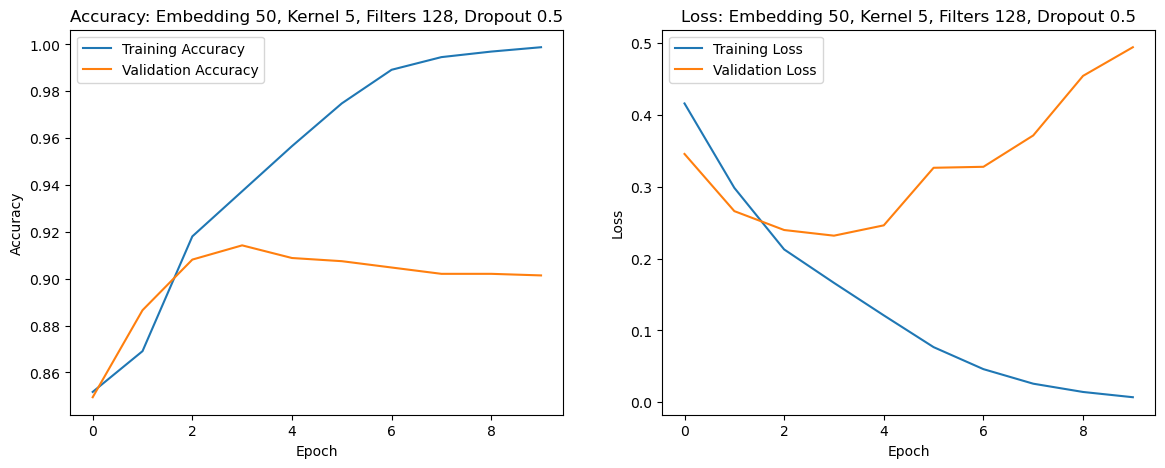


Best Model Parameters: {'embedding_dim': 50, 'kernel_size': 5, 'filters': 128, 'dropout_rate': 0.5}
Best Test Accuracy: 90.14%
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       223
           1       0.92      0.97      0.94      1258

    accuracy                           0.90      1481
   macro avg       0.83      0.75      0.78      1481
weighted avg       0.89      0.90      0.89      1481



In [20]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report

# Data Preparation
max_words = 700
X_train, X_test, y_train, y_test = train_test_split(
    train_data['lemmatized_reviews'], train_data['sentiments'], test_size=0.2, random_state=1
)
tokenizer = Tokenizer(num_words=max_words, oov_token='')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = sequence.pad_sequences(X_train_sequences, maxlen=max_length)
X_test_padded = sequence.pad_sequences(X_test_sequences, maxlen=max_length)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Parameter Tuning
embedding_dims = [50]
kernel_sizes = [5]
num_filters = [128]
dropout_rates = [0.5]

best_model = None
best_acc = 0
best_params = {}

for embedding_dim in embedding_dims:
    for kernel_size in kernel_sizes:
        for filters in num_filters:
            for dropout_rate in dropout_rates:
                print(f"Testing with embedding_dim={embedding_dim}, kernel_size={kernel_size}, filters={filters}, dropout_rate={dropout_rate}")

                # Create the CNN model
                model = Sequential()
                model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
                model.add(Conv1D(filters, kernel_size, activation='relu'))
                model.add(GlobalMaxPooling1D())
                model.add(Dense(128, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(2, activation='softmax'))

                # Compile the model
                model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train the model and store history
                history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), batch_size=64, epochs=10, verbose=0)

                # Evaluate on test set
                test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=0)

                # Save the best model
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_model = model
                    best_params = {
                        'embedding_dim': embedding_dim,
                        'kernel_size': kernel_size,
                        'filters': filters,
                        'dropout_rate': dropout_rate
                    }

                print(f"Test Accuracy: {test_acc * 100:.2f}%")

                # Plotting training and validation accuracy/loss
                plt.figure(figsize=(14, 5))

                # Accuracy plot
                plt.subplot(1, 2, 1)
                plt.plot(history.history['accuracy'], label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.title(f"Accuracy: Embedding {embedding_dim}, Kernel {kernel_size}, Filters {filters}, Dropout {dropout_rate}")
                plt.legend()

                # Loss plot
                plt.subplot(1, 2, 2)
                plt.plot(history.history['loss'], label='Training Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title(f"Loss: Embedding {embedding_dim}, Kernel {kernel_size}, Filters {filters}, Dropout {dropout_rate}")
                plt.legend()

                plt.show()

# Final evaluation of best model
print("\nBest Model Parameters:", best_params)
print(f"Best Test Accuracy: {best_acc * 100:.2f}%")

# Classification report for best model
y_pred_probs = best_model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred))

In [21]:
import json
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences
X_test_sequences = tokenizer.texts_to_sequences(test_data['lemmatized_reviews'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length)

# Make predictions
y_test_pred_probs = best_model.predict(X_test_padded)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Display the predictions
test_data['predicted_sentiment'] = y_test_pred
test_data.to_csv('test_results_learned.csv', index=False)
print(test_data[['reviews', 'predicted_sentiment']])

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
                                                reviews  predicted_sentiment
0     I bought 2 sleepers.  sleeper had holes in the...                    0
1     I dare say these are just about the sexiest th...                    1
2     everything about the transaction (price, deliv...                    1
3     Not bad for just a shirt.  Very durable, and m...                    1
4     These are truly wrinkle free and longer than t...                    1
...                                                 ...                  ...
1846  These are stylish and nice and perfect to wear...                    1
1847  We bought these long-sleeved colored shirts fo...                    1
1848  These are really cute and very sexy.  They wil...                    1
1849  These shoers were for my daughter.  She loves ...                    1
1850  Most umbrellas handle a light rain well, but l...                    1

[1851 rows x 2 columns]
